#### Обработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pymc3 import  *

%matplotlib inline

In [2]:
from scipy import optimize as opt 
import scipy
import scipy.odr as odr

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
import plotly 
plotly.tools.set_credentials_file(username='faradayhey', api_key='G5AsUSWlmI9BsmluQakB')

In [5]:
data_23 = pd.read_csv('data/23.csv')
data_23['I'] = data_23['I'] + 0.083
print(data_23[data_23['I'] == data_23['I'].min()])

data_22 = pd.read_csv('data/22.csv')
data_22['I'] = data_22['I'] + 0.079
print(data_22[data_22['I'] == data_22['I'].min()])

data_20 = pd.read_csv('data/20.csv')
data_20['I'] = data_20['I'] + 0.076
print(data_20[data_20['I'] == data_20['I'].min()])

data_15 = pd.read_csv('data/15.csv')
data_15 = data_15.drop(data_15.index[[12]])
data_15['I'] = data_15['I'] + 0.068
print(data_15[data_15['I'] == data_15['I'].min()])

data_12 = pd.read_csv('data/12.csv')
data_12['I'] = data_12['I'] + 0.064
print(data_12[data_12['I'] == data_12['I'].min()])

data_10 = pd.read_csv('data/10.csv')
data_10['I'] = data_10['I'] + 0.062
print(data_10[data_10['I'] == data_10['I'].min()])

data_8 = pd.read_csv('data/8.csv')
data_8['I'] = data_8['I'] + 0.06
print(data_8[data_8['I'] == data_8['I'].min()])

data_1600 = pd.read_csv('data/1600.csv')
data_1600['I'] = data_1600['I'] + 0.043
print(data_1600[data_1600['I'] == data_1600['I'].min()])

data_1650 = pd.read_csv('data/1650.csv')
data_1650['I'] = data_1650['I'] + 0.046
print(data_1650[data_1650['I'] == data_1650['I'].min()])

data_1700 = pd.read_csv('data/1700.csv')
data_1700['I'] = data_1700['I'] + 0.051
print(data_1700[data_1700['I'] == data_1700['I'].min()])

data_1750 = pd.read_csv('data/1750.csv')
data_1750['I'] = data_1750['I'] + 0.044
print(data_1750[data_1750['I'] == data_1750['I'].min()])

data_1800 = pd.read_csv('data/1800.csv')
data_1800['I'] = data_1800['I'] + 0.053
print(data_1800[data_1800['I'] == data_1800['I'].min()])

calibration = pd.read_csv('data/calibration.csv')

      V    I
18 -1.0  0.0
        V    I
12 -1.034  0.0
       V    I
7 -0.734  0.0
8 -0.867  0.0
        V    I
14 -0.878  0.0
        V    I
11 -0.685  0.0
       V    I
5 -0.558  0.0
6 -0.595  0.0
7 -0.560  0.0
        V    I
10 -0.672  0.0
       V    I
9 -0.883  0.0
       V    I
9 -0.934  0.0
        V    I
13 -1.063  0.0
        V             I
11 -0.887 -6.938894e-18
12 -0.900 -6.938894e-18
     V    I
8 -1.1  0.0


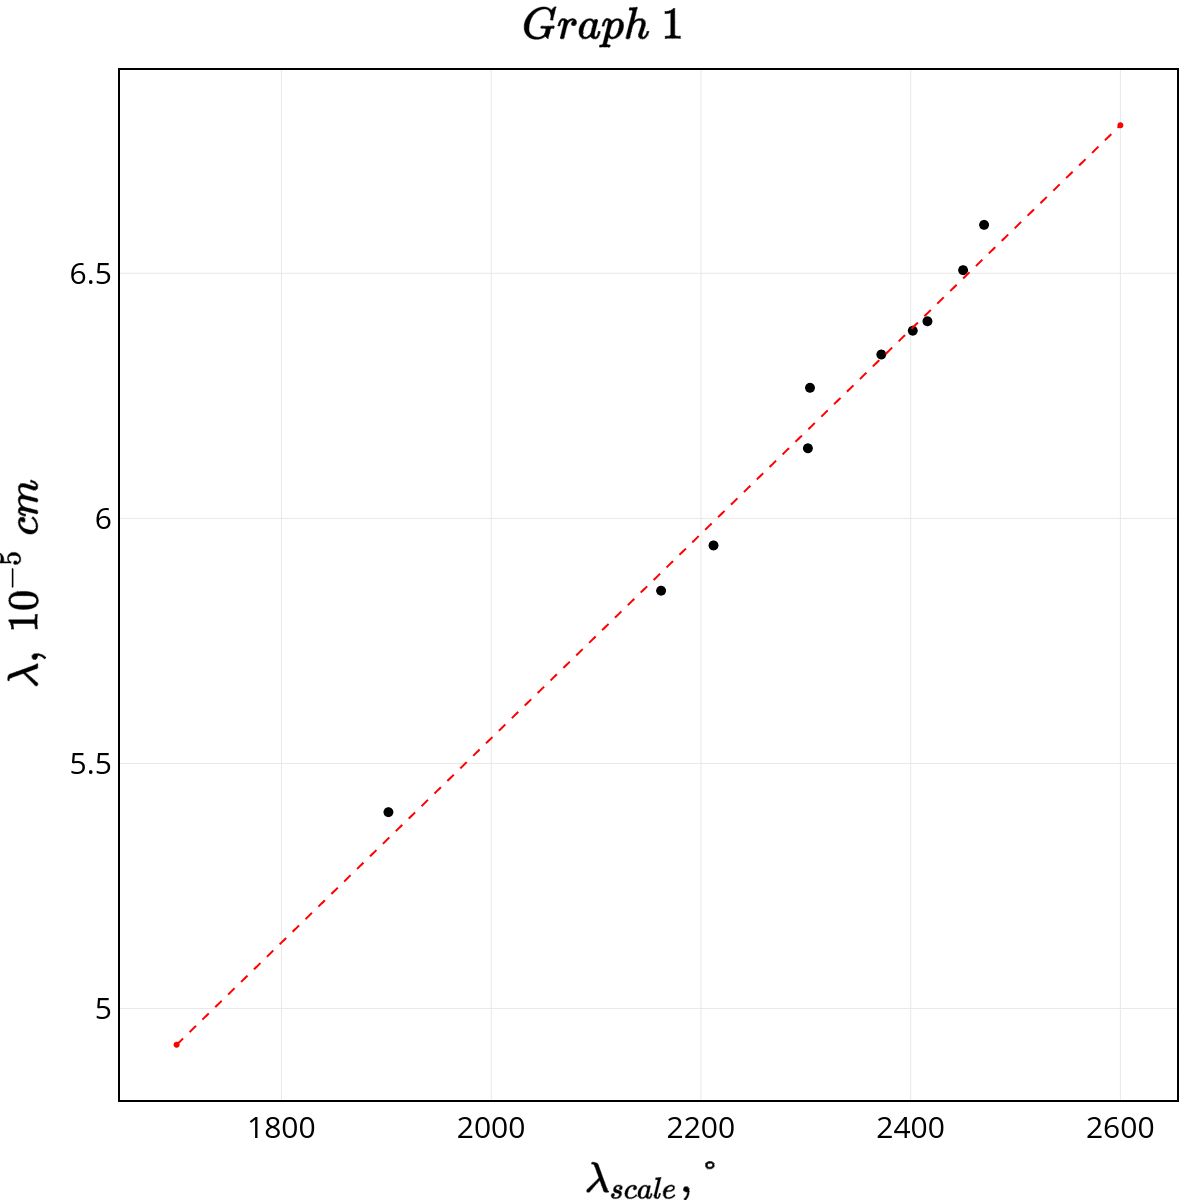

In [6]:
trace1 = go.Scatter(
    x = calibration['scale'],
    y = calibration['len'] / 1000,
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [1700, 2600],
    y = [(1381.80098951 + 2.08477674 * 1700) / 1000, (1381.80098951 + 2.08477674 * 2600) / 1000],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$Graph~1$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$\lambda_{scale}, ° $',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\lambda,~10^{-5}~cm$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [7]:
lengths = [5400.56, 5852.49, 5944.83, 6143.06, 6266.49, 6334.42, 6402.24, 1381.80098951 + 2.08477674 * 1600, 1381.80098951 + 2.08477674 * 1650, 1381.80098951 + 2.08477674 * 1700, 1381.80098951 + 2.08477674 * 1750, 1381.80098951 + 2.08477674 * 1800]

In [8]:
lengths

[5400.56,
 5852.49,
 5944.83,
 6143.06,
 6266.49,
 6334.42,
 6402.24,
 4717.44377351,
 4821.68261051,
 4925.92144751,
 5030.160284510001,
 5134.3991215099995]

In [9]:
calibration = calibration.drop(calibration.index[[4]])

In [10]:
X = np.reshape(np.array(calibration['scale']), (1, len(calibration['scale'])))
Y = np.reshape(np.array(calibration['len']), (1, len(calibration['len'])))
def f(x, a, b):
    return a * x + b 
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[    2.08477674  1381.80098951]
[  8.43774980e-02   1.94496668e+02]


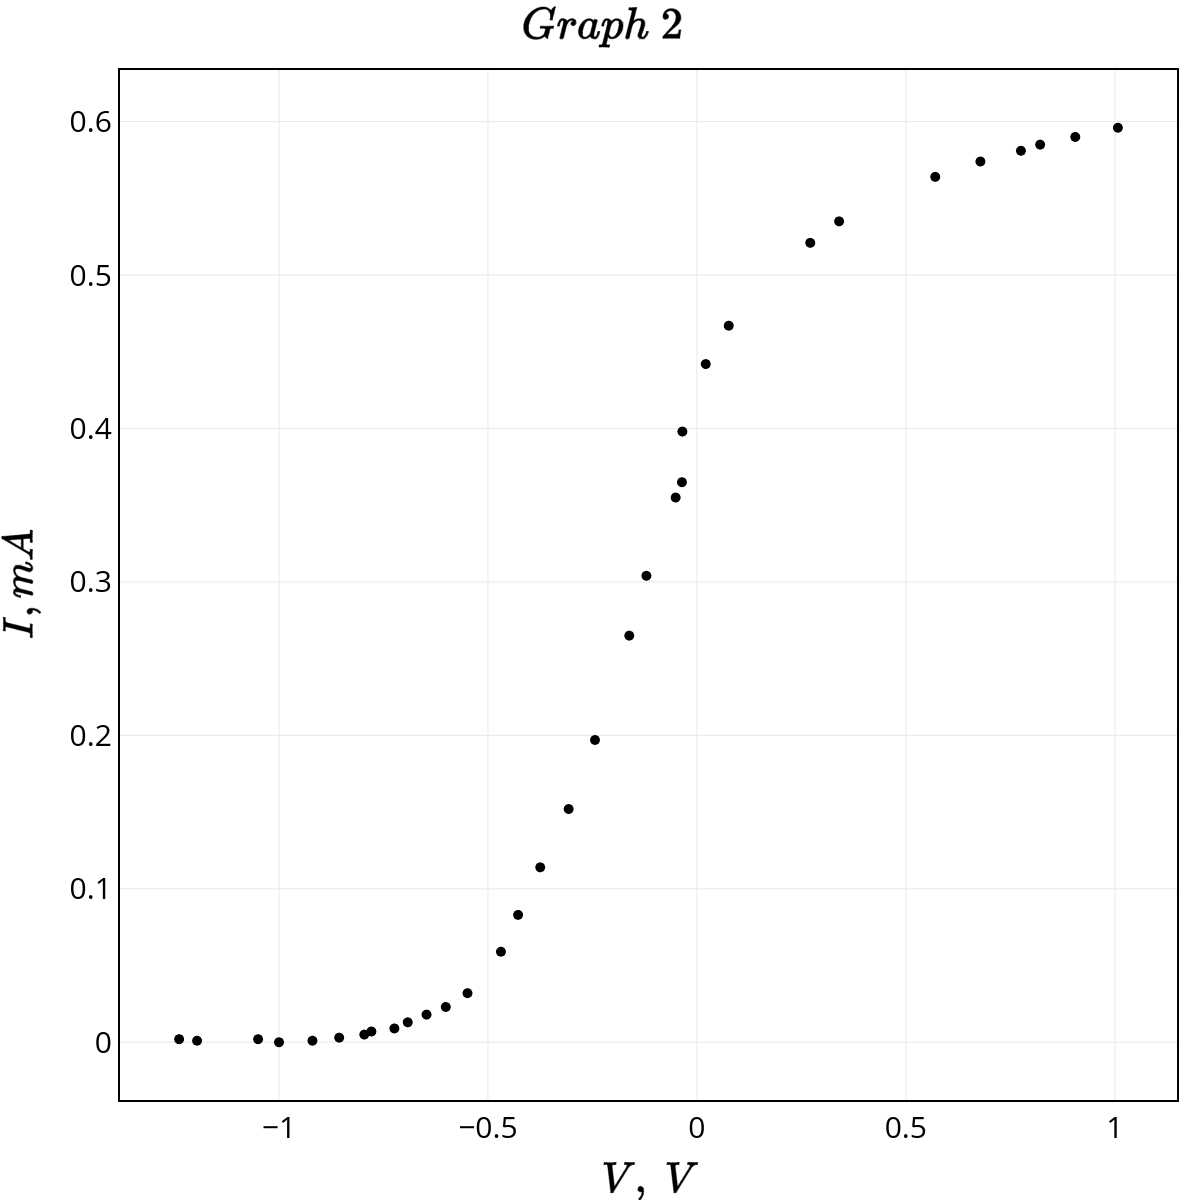

In [11]:
trace1 = go.Scatter(
    x = data_23['V'],
    y = data_23['I'],
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)

trace0 = [trace1]

layout = go.Layout(
    title = "$Graph~2$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, mA$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

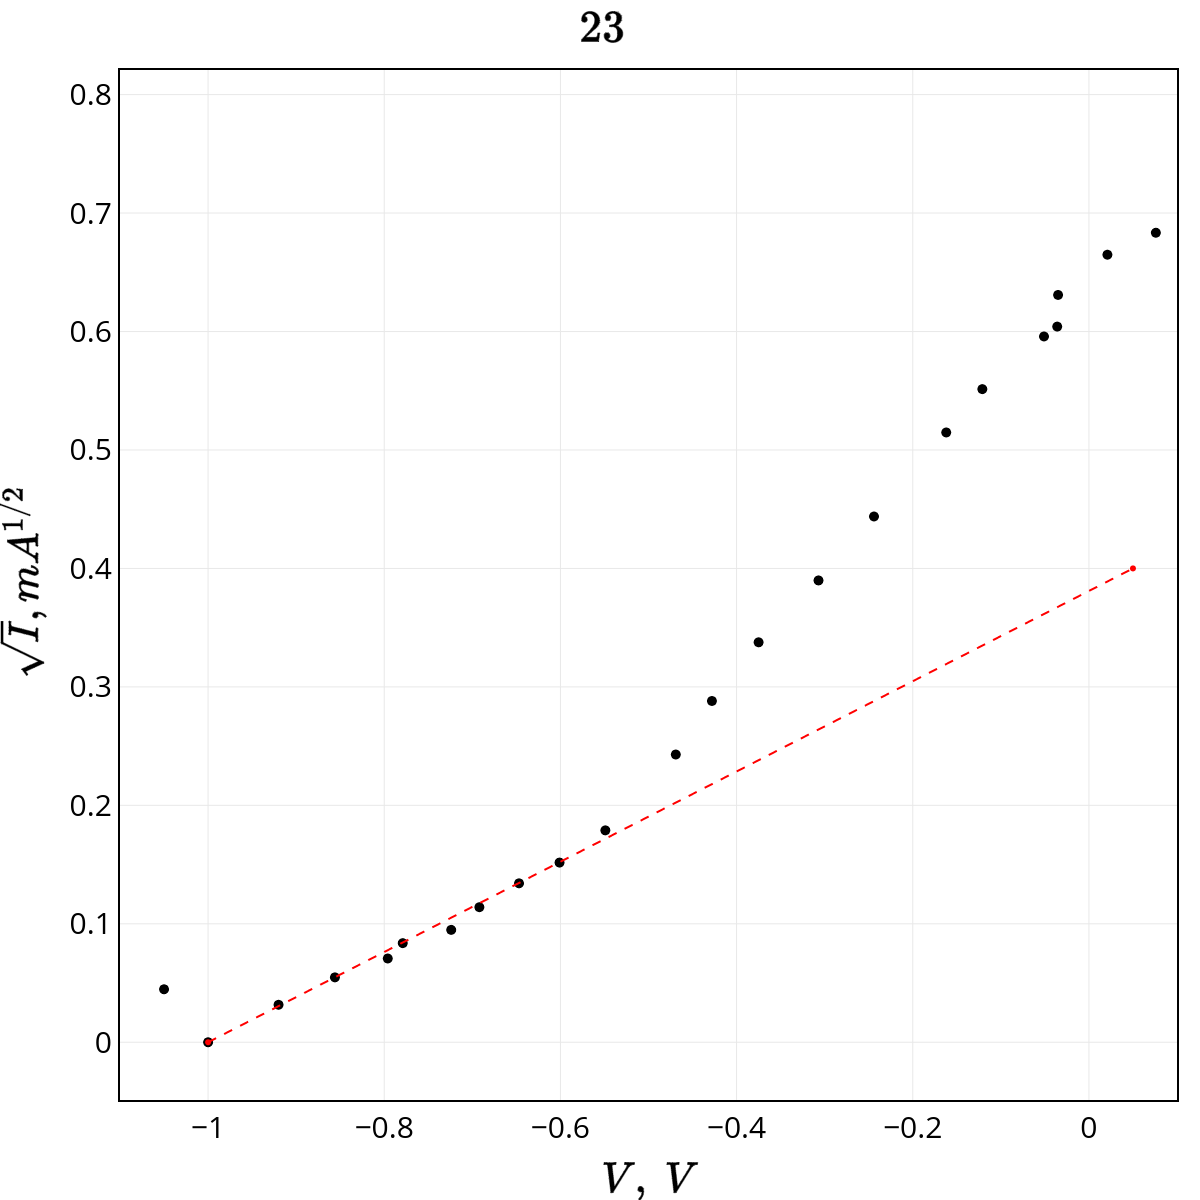

In [12]:
trace1 = go.Scatter(
    x = data_23['V'],
    y = np.sqrt(data_23['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [-1.0, 0.05],
    y = [0.0, 0.4],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$23$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        range = [-1.1, 0.1],
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '23.png')
#! open my_plot.png
from IPython.display import Image
Image("23.png", width=500)

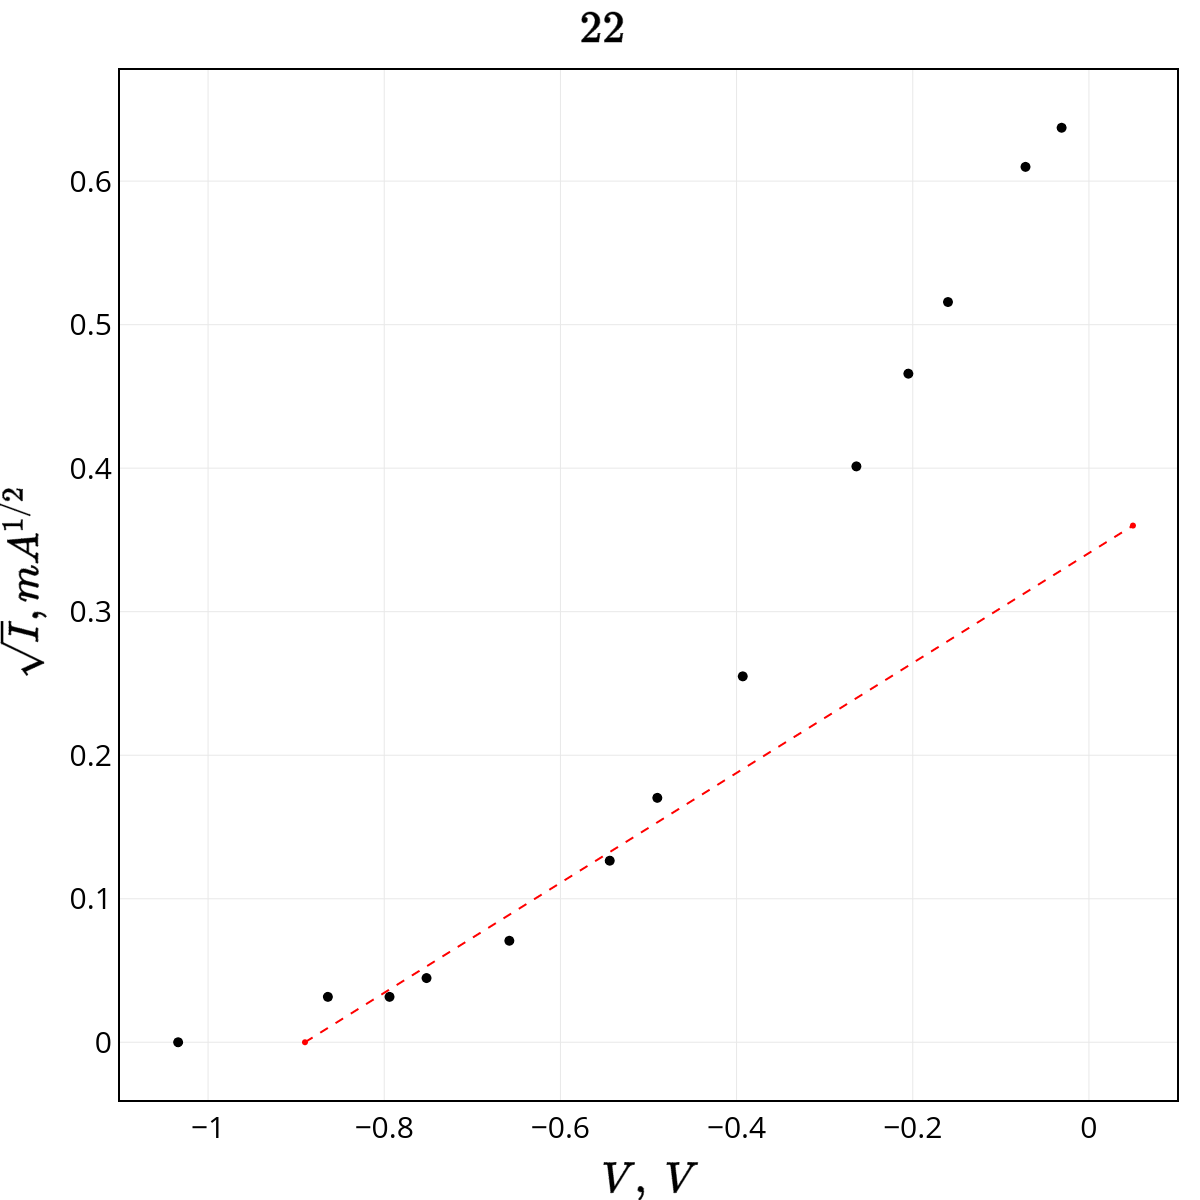

In [13]:
trace1 = go.Scatter(
    x = data_22['V'],
    y = np.sqrt(data_22['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [-0.89, 0.05],
    y = [0.0, 0.36],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$22$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
# #py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '22.png')
# #! open my_plot.png
from IPython.display import Image
Image("22.png", width=500)

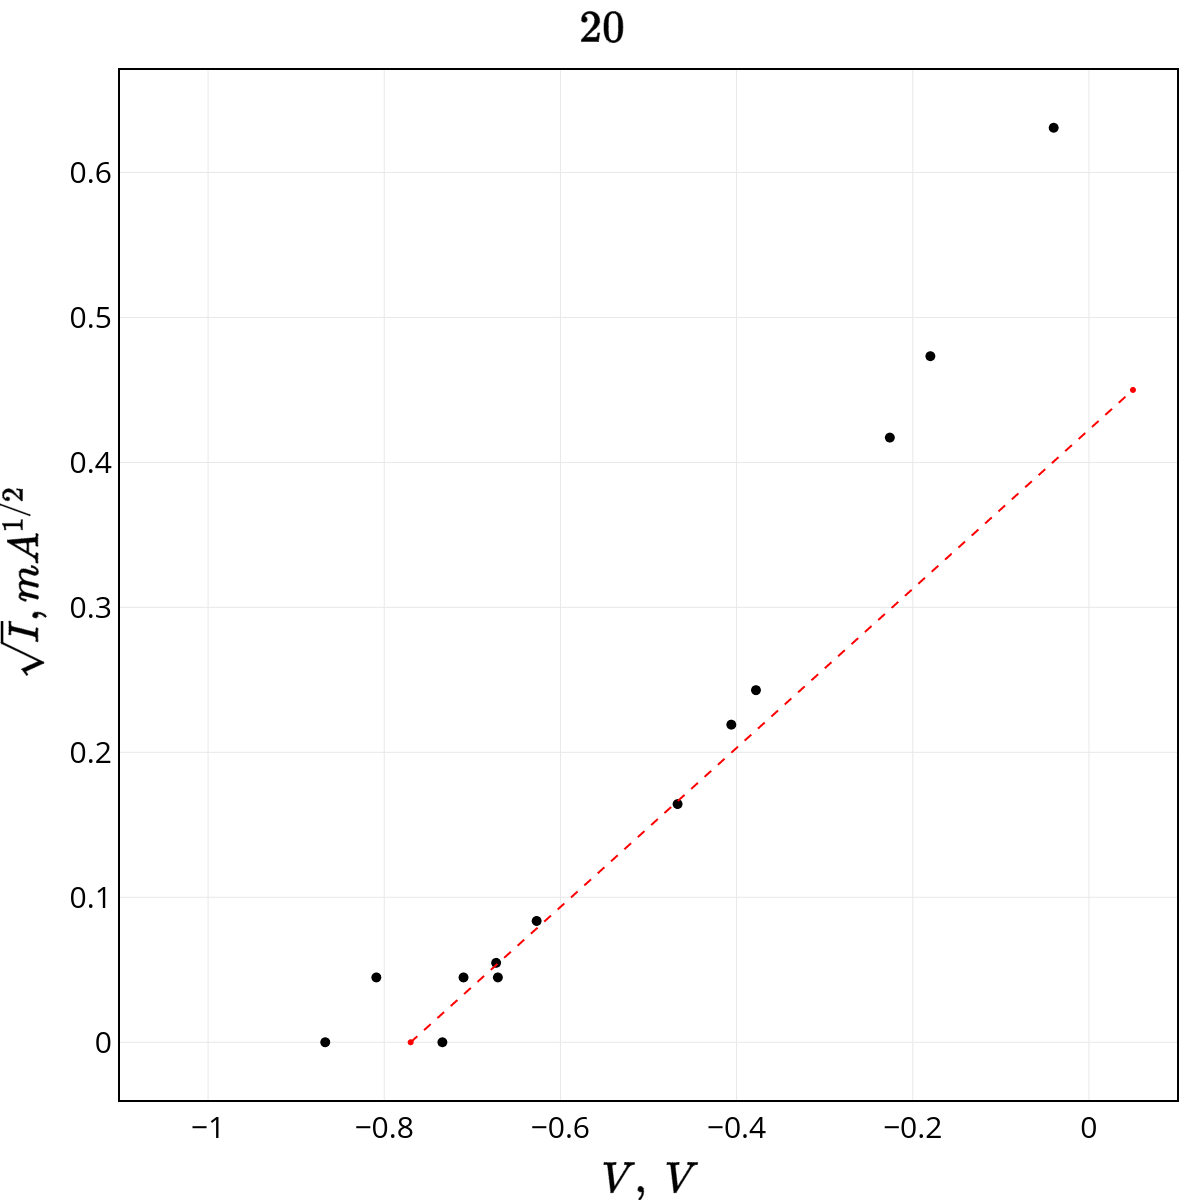

In [14]:
trace1 = go.Scatter(
    x = data_20['V'],
    y = np.sqrt(data_20['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [-0.77, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$20$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '20.png')
#! open my_plot.png
from IPython.display import Image
Image("20.png", width=500)

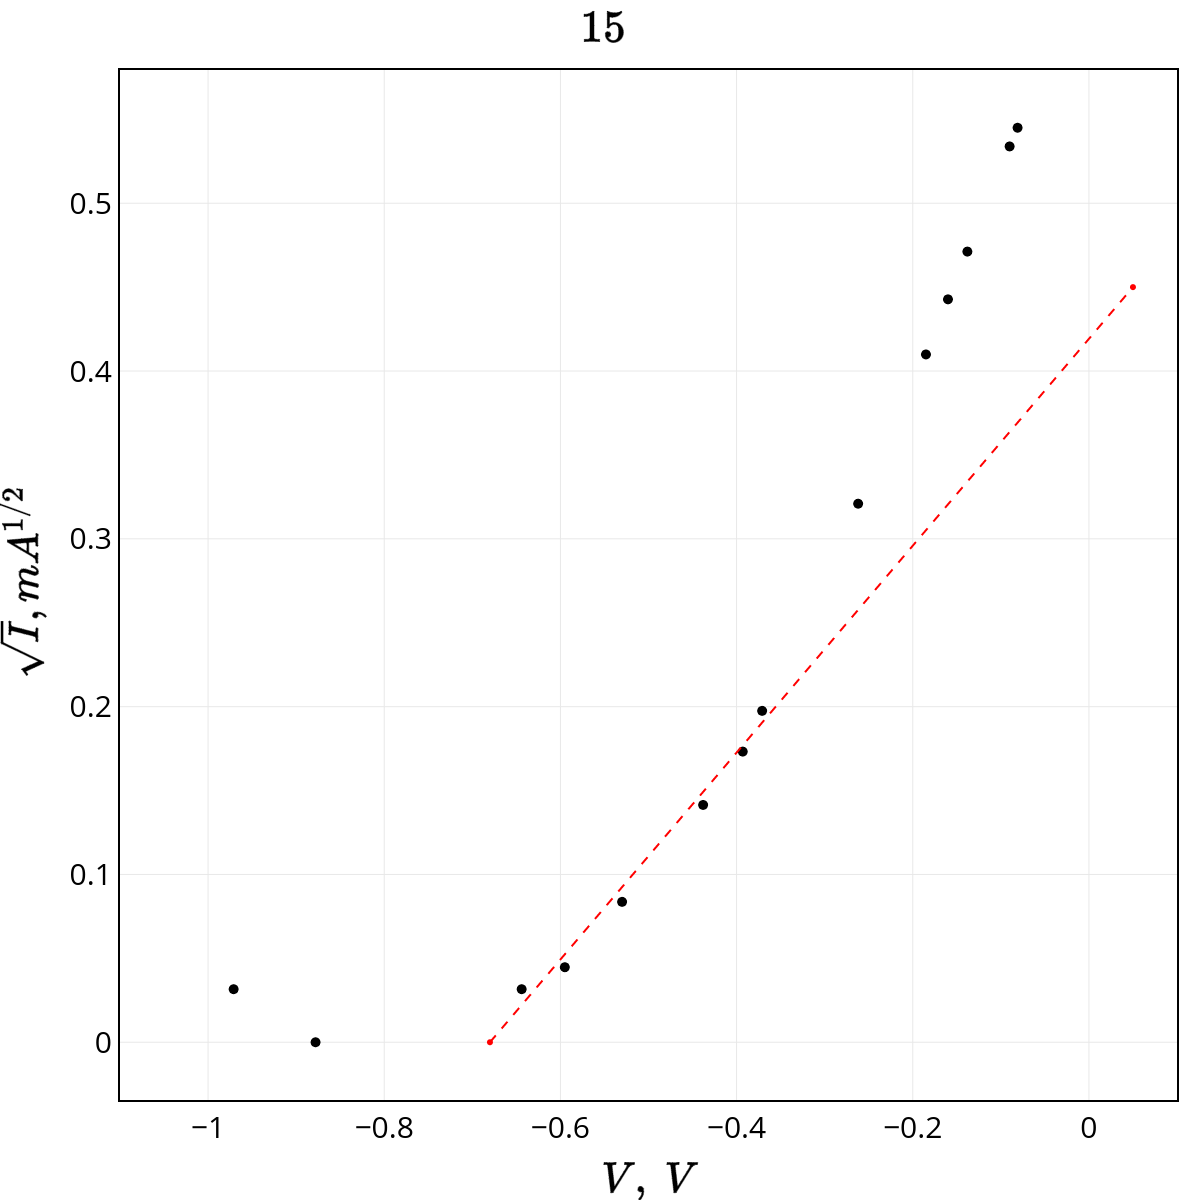

In [15]:
trace1 = go.Scatter(
    x = data_15['V'],
    y = np.sqrt(data_15['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [-0.68, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$15$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '15.png')
#! open my_plot.png
from IPython.display import Image
Image("15.png", width=500)

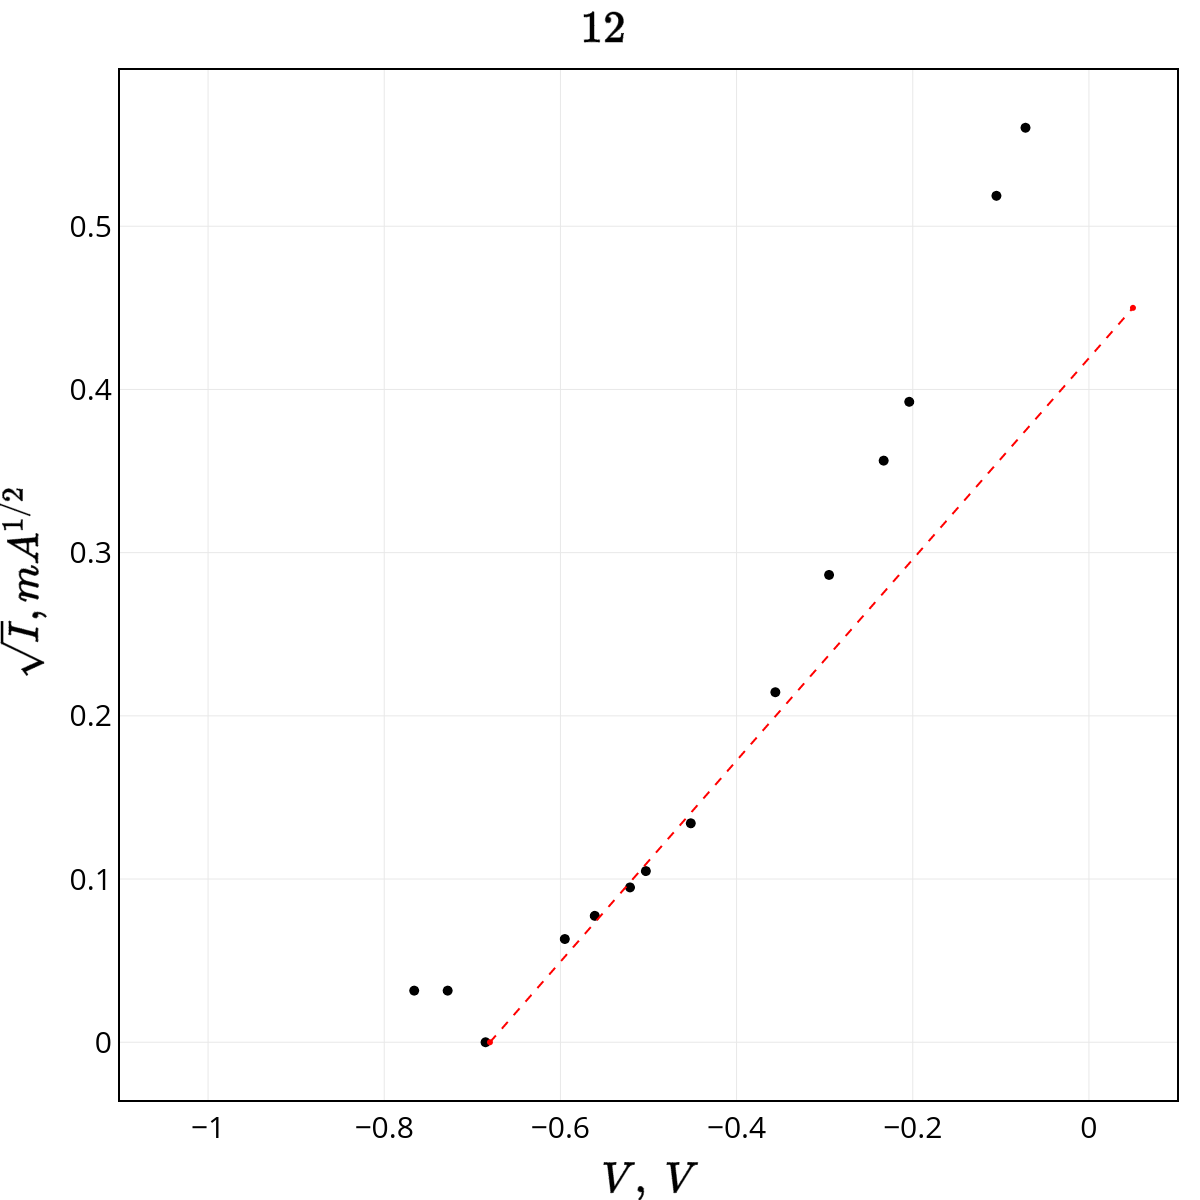

In [16]:
trace1 = go.Scatter(
    x = data_12['V'],
    y = np.sqrt(data_12['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [-0.68, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$12$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '12.png')
#! open my_plot.png
from IPython.display import Image
Image("12.png", width=500)

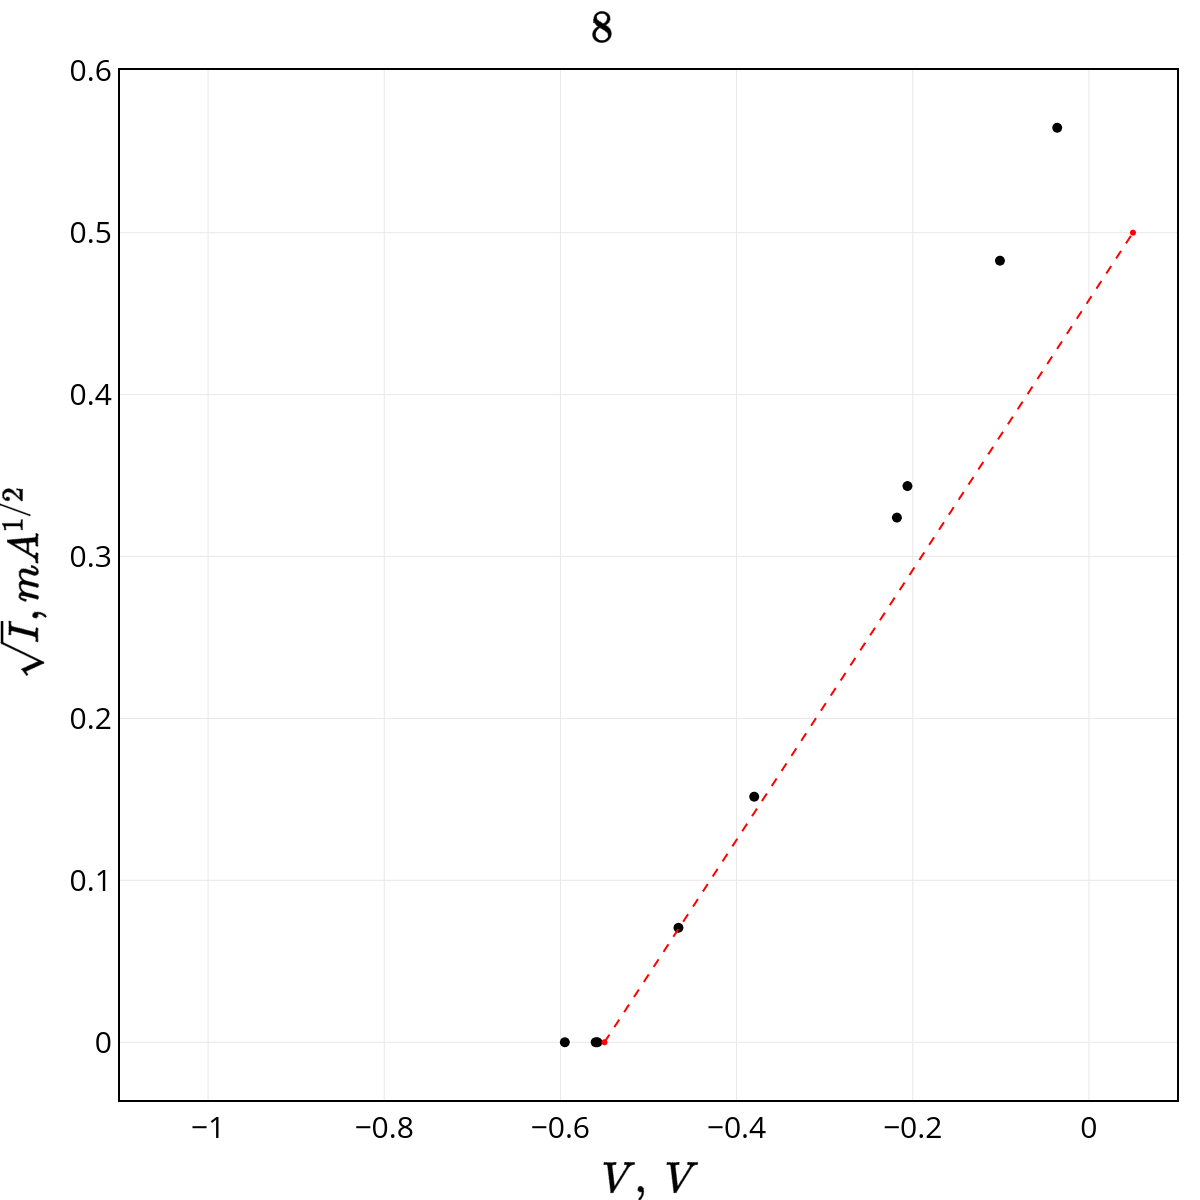

In [17]:
trace1 = go.Scatter(
    x = data_10['V'],
    y = np.sqrt(data_10['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [-0.55, 0.05],
    y = [0.0, 0.5],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)
trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$8$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '8.png')
#! open my_plot.png
from IPython.display import Image
Image("8.png", width=500)

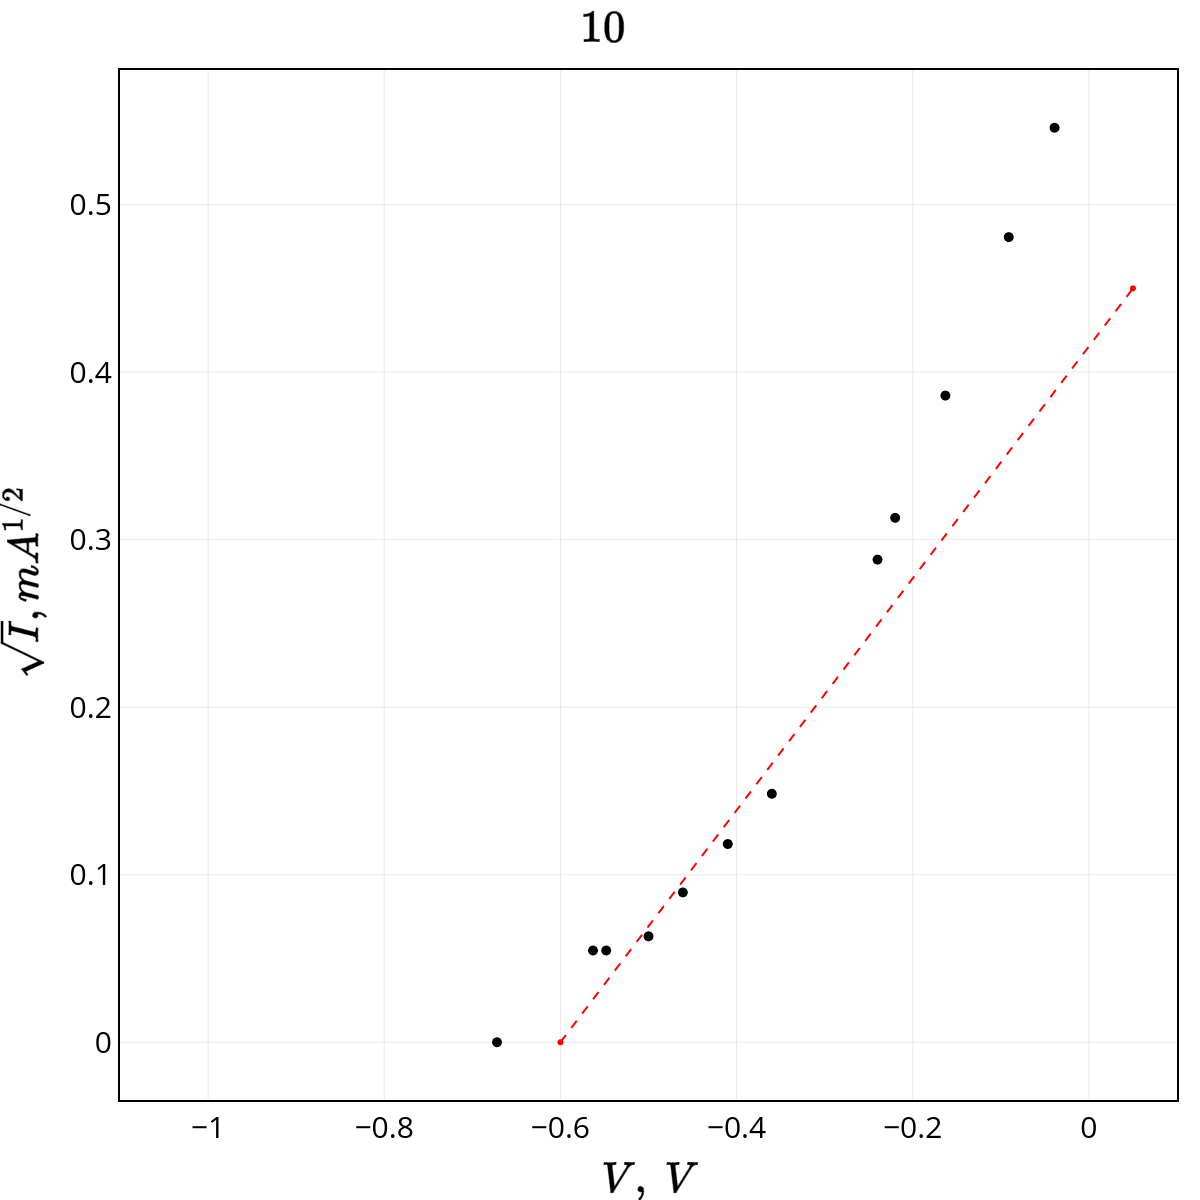

In [18]:
trace1 = go.Scatter(
    x = data_8['V'],
    y = np.sqrt(data_8['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)


trace2 = go.Scatter(
    x = [-0.60, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$10$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '10.png')
#! open my_plot.png
from IPython.display import Image
Image("10.png", width=500)

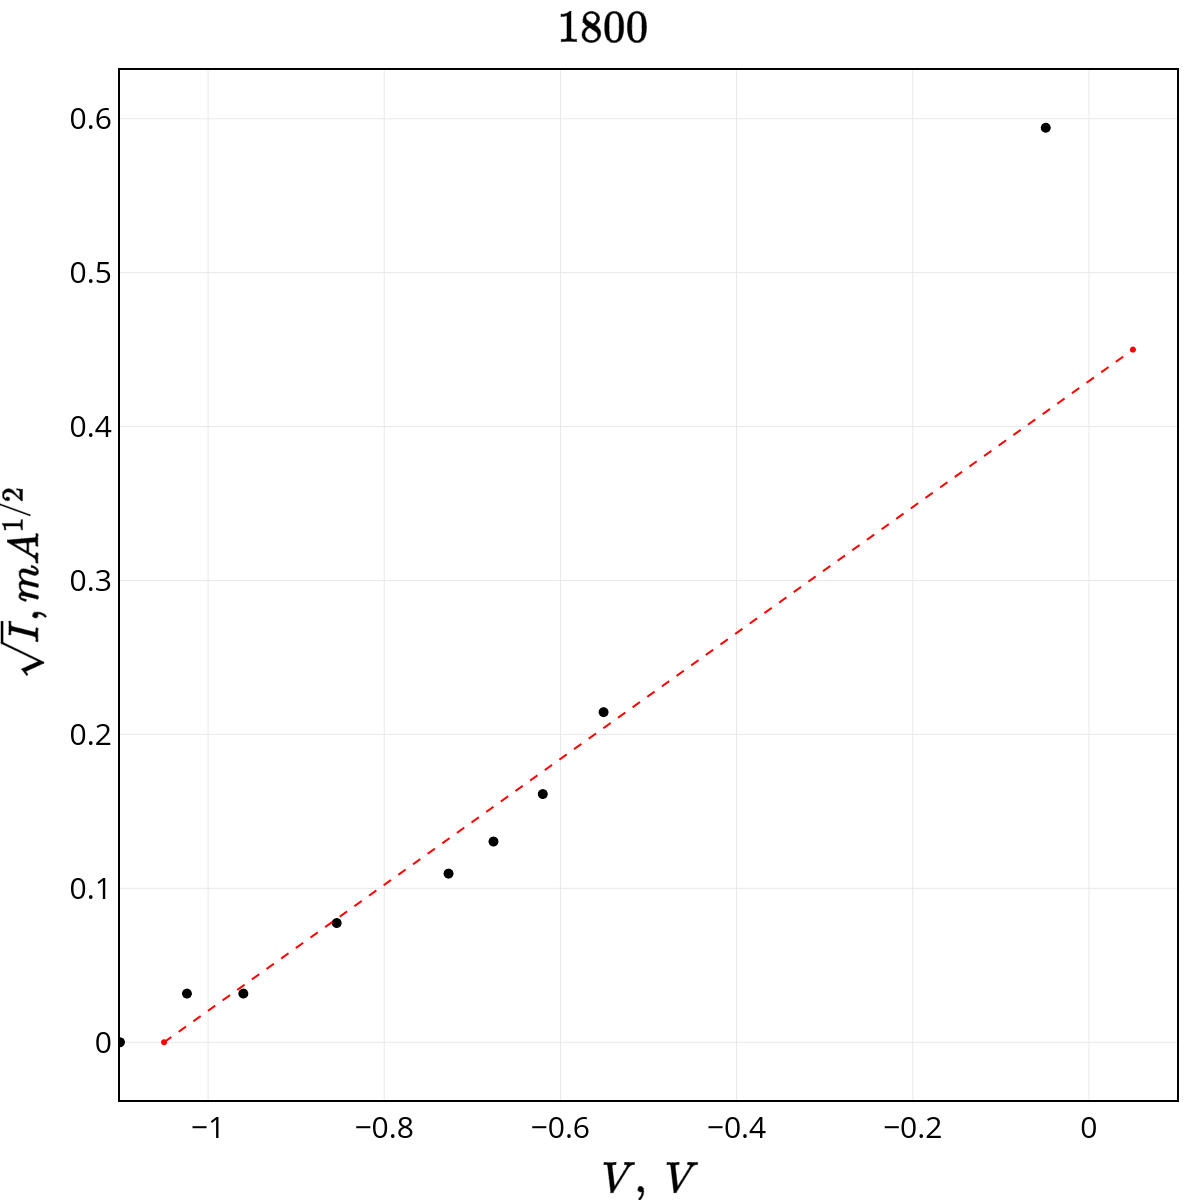

In [19]:
trace1 = go.Scatter(
    x = data_1800['V'],
    y = np.sqrt(data_1800['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)


trace2 = go.Scatter(
    x = [-1.05, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$1800$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '1800.png')
#! open my_plot.png
from IPython.display import Image
Image("1800.png", width=500)

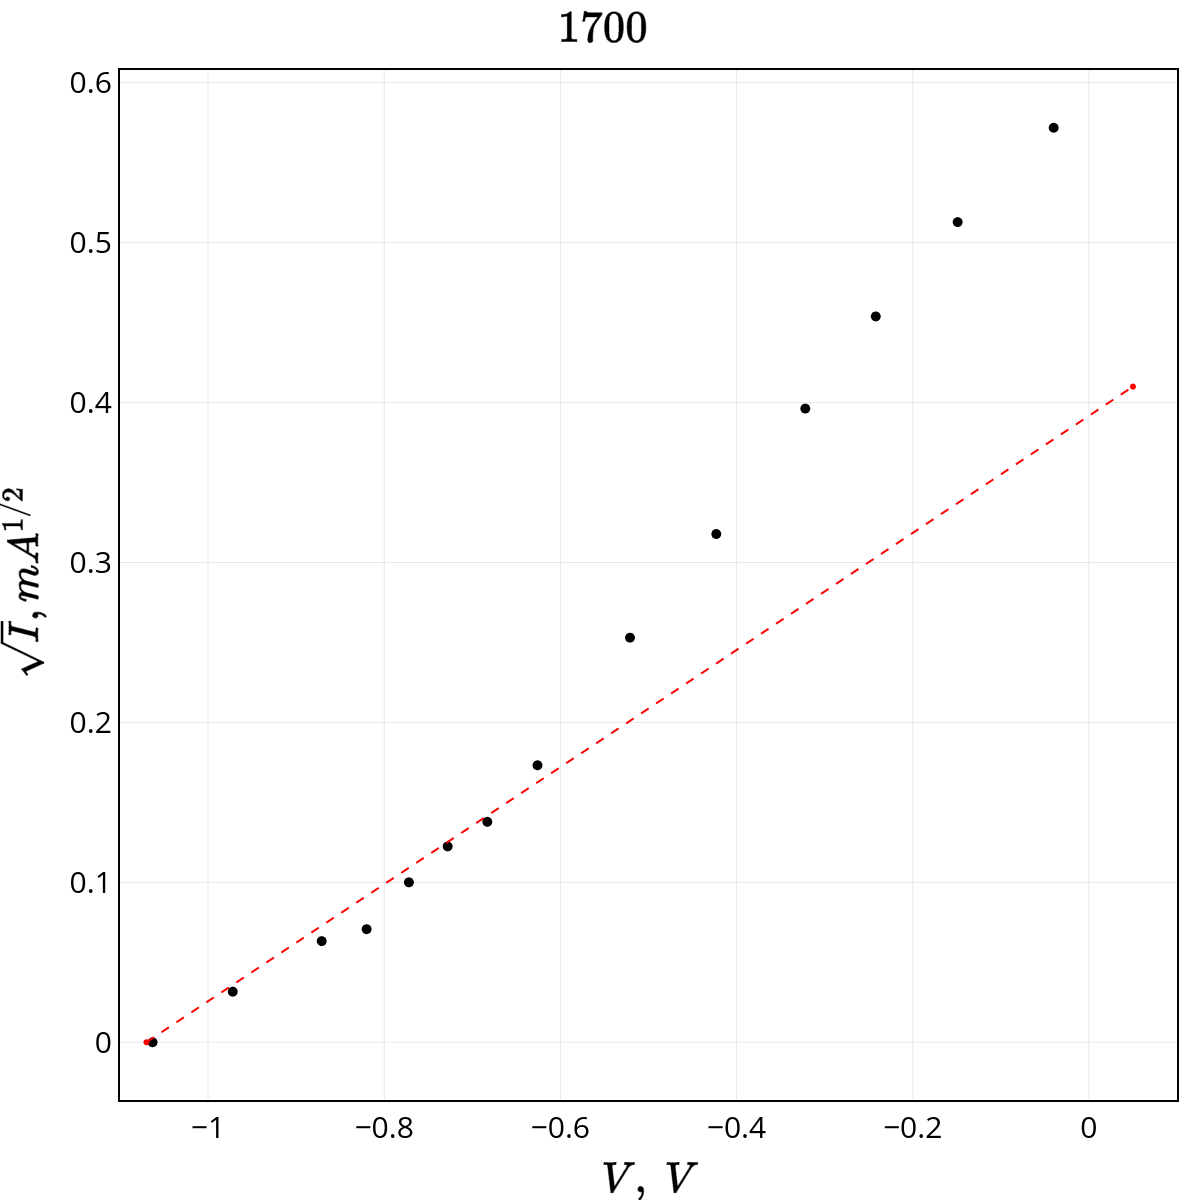

In [35]:
trace1 = go.Scatter(
    x = data_1700['V'],
    y = np.sqrt(data_1700['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)


trace2 = go.Scatter(
    x = [-1.07, 0.05],
    y = [0.0, 0.41],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$1700$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, '1700.png')
#! open my_plot.png
from IPython.display import Image
Image("1700.png", width=500)

In [21]:
lengths = [1381.80098951 + 2.08477674 * 1700, 1381.80098951 + 2.08477674 * 1800, 5400.56, 5852.49, 5944.83, 6143.06, 6266.49, 6334.42, 6402.24]

In [22]:
v0 = [-1.07, -1.05, -1.0, -0.89, -0.77, -0.68, -0.67, -0.6, -0.55]

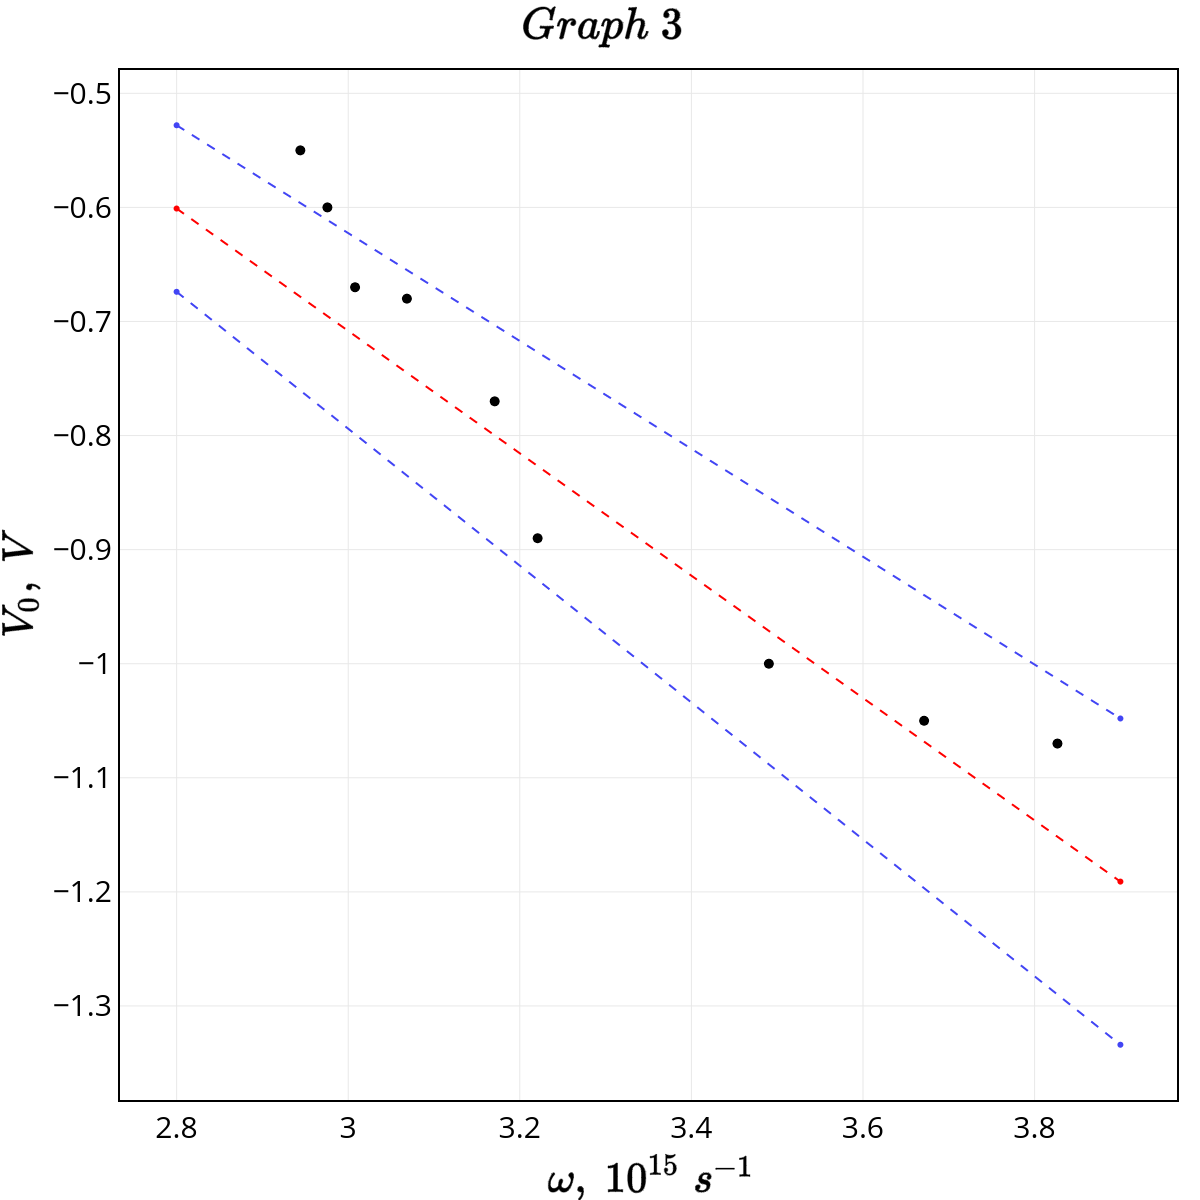

In [23]:
trace1 = go.Scatter(
    x = (300 * 10**(6)) / (np.array(lengths) * 10**(-10)) * 2 * np.pi / 10**(15),
    y = np.array(v0),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    )
)


trace2 = go.Scatter(
    x = [2.8, 3.9],
    y = [1.11 - 0.590 * 2.9, 1.11 - 0.590 * 3.9],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3 = go.Scatter(
    x = [2.8, 3.9],
    y = [1.11 - 0.13 - (0.590 - 0.07) * 2.9, 1.11 - 0.13 - (0.590 - 0.07) * 3.9],
    line = dict(
        color = ('#4245f4'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace4 = go.Scatter(
    x = [2.8, 3.9],
    y = [1.11 + 0.13 - (0.590 + 0.07) * 2.9, 1.11 + 0.13 - (0.590 + 0.07) * 3.9],
    line = dict(
        color = ('#4245f4'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = "$Graph~3$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$\omega,~10^{15}~s^{-1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$V_0,~V$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

In [24]:
X = np.reshape(np.array((300 * 10**(6)) / (np.array(lengths) * 10**(-10)) * 2 * np.pi), 
               (1, len((300 * 10**(6)) / (np.array(lengths) * 10**(-10)) * 2 * np.pi,)))
Y = np.reshape(np.array(np.array(v0)), (1, len(np.array(v0))))
def f(x, a, b):
    return a * x + b 
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[ -5.90707675e-16   1.11918262e+00]
[  6.76910154e-17   2.21901653e-01]


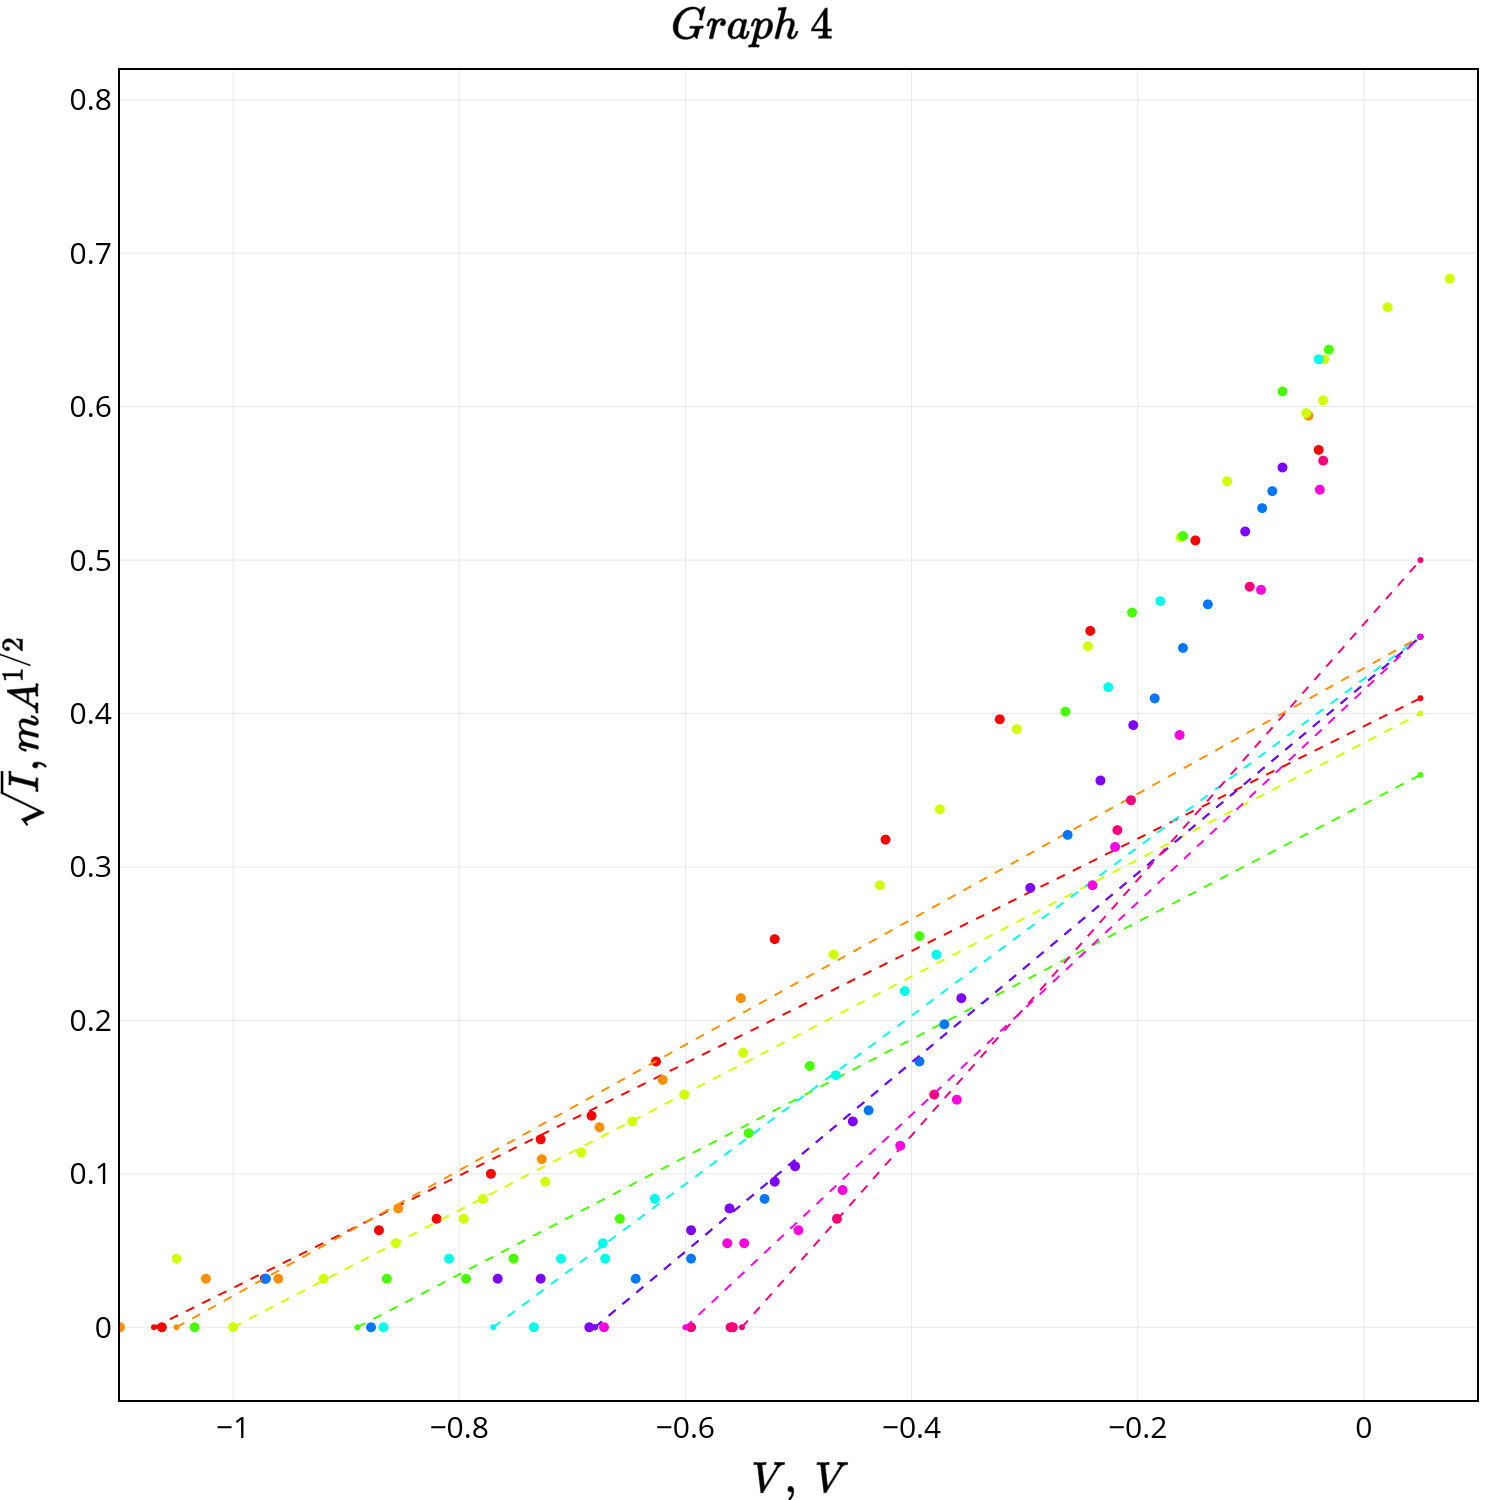

In [34]:
trace1700 = go.Scatter(
    x = data_1700['V'],
    y = np.sqrt(data_1700['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    )
)


trace2_1700 = go.Scatter(
    x = [-1.07, 0.05],
    y = [0.0, 0.41],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace1800 = go.Scatter(
    x = data_1800['V'],
    y = np.sqrt(data_1800['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff9000'
    )
)


trace2_1800 = go.Scatter(
    x = [-1.05, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#ff9000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace23 = go.Scatter(
    x = data_23['V'],
    y = np.sqrt(data_23['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#d0ff00'
    )
)

trace2_23 = go.Scatter(
    x = [-1.0, 0.05],
    y = [0.0, 0.4],
    line = dict(
        color = ('#d0ff00'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace22 = go.Scatter(
    x = data_22['V'],
    y = np.sqrt(data_22['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#48ff00'
    )
)

trace2_22 = go.Scatter(
    x = [-0.89, 0.05],
    y = [0.0, 0.36],
    line = dict(
        color = ('#48ff00'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace20 = go.Scatter(
    x = data_20['V'],
    y = np.sqrt(data_20['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#00ffe9'
    )
)

trace2_20 = go.Scatter(
    x = [-0.77, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#00ffe9'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace15 = go.Scatter(
    x = data_15['V'],
    y = np.sqrt(data_15['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#0077ff'
    )
)

trace2_15 = go.Scatter(
    x = [-0.68, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#0077ff'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace12 = go.Scatter(
    x = data_12['V'],
    y = np.sqrt(data_12['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#7f00ff'
    )
)

trace2_12 = go.Scatter(
    x = [-0.68, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#7f00ff'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace8 = go.Scatter(
    x = data_10['V'],
    y = np.sqrt(data_10['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff007b'
    )
)

trace2_8 = go.Scatter(
    x = [-0.55, 0.05],
    y = [0.0, 0.5],
    line = dict(
        color = ('#ff007b'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace10 = go.Scatter(
    x = data_8['V'],
    y = np.sqrt(data_8['I']),
    mode = 'markers',
#     error_y = dict(
#         type = 'data',
#         array = data_sorted['err_W'],
#         visible = True,
#         color = '#000000',
#         thickness = 2,
#         width = 2
#     ),
#     error_x = dict(
#         type = 'constant',
#         value = 1.,
#         visible = True,
#         color = '#000000'
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff00e1'
    )
)


trace2_10 = go.Scatter(
    x = [-0.60, 0.05],
    y = [0.0, 0.45],
    line = dict(
        color = ('#ff00e1'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1700, trace2_1700, trace1800, trace2_1800, trace23, trace2_23, trace22, trace2_22, trace20, trace2_20, 
         trace15, trace2_15, trace12, trace2_12, trace8, trace2_8, trace10, trace2_10]

layout = go.Layout(
    title = "$Graph~4$",
    width = 1500,
    height = 1500,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$V,~V$',
        zeroline = False,
        ticklen = 0,
        range = [-1.1, 0.1],
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sqrt{I}, mA^{1/2}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot4.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot4.png", width=500)